## Descriptive Statistics

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Summary Statistics
df_filtered2_norm = pd.read_csv('data/df_filtered2_norm.tsv', sep='\t') # load file back on
summary_stats = df_filtered2_norm.describe()
print("Summary Statistics:\n")
summary_stats

Summary Statistics:



,Protein_Length,Protein_Probability,Top_Peptide_Probability,Combined_Total_Peptides,Combined_Spectral_Count,Combined_Unique_Spectral_Count,Combined_Total_Spectral_Count,CITO_CTRL_R1_Spectral_Count,CITO_CTRL_R2_Spectral_Count,CITO_EGF_R1_Spectral_Count,...,CITO_EGF_R1_MaxLFQIntensity,CITO_EGF_R2_MaxLFQIntensity,MEMB_CTRL_R1_MaxLFQIntensity,MEMB_CTRL_R2_MaxLFQIntensity,MEMB_EGF_R1_MaxLFQIntensity,MEMB_EGF_R2_MaxLFQIntensity,NUC_CTRL_R1_MaxLFQIntensity,NUC_CTRL_R2_MaxLFQIntensity,NUC_EGF_R1_MaxLFQIntensity,NUC_EGF_R2_MaxLFQIntensity
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,...,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,427.063492,0.993507,0.998096,7.043290,33.597403,26.450216,40.670996,3.075036,3.487734,4.044733,...,0.144300,0.144300,0.144300,0.144300,0.144300,0.144300,0.144300,0.144300,0.144300,0.144300
std,458.311467,0.031459,0.003529,8.524251,71.951540,51.936899,84.314894,8.041627,8.554580,10.054017,...,0.529954,0.555072,0.602649,1.009156,0.499450,0.572575,0.812400,0.741271,0.623073,0.609324
min,33.000000,0.708700,0.966200,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,198.000000,1.000000,0.998900,3.000000,6.000000,5.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,321.000000,1.000000,0.999000,4.000000,12.000000,10.000000,14.000000,1.000000,1.000000,1.000000,...,0.040740,0.037359,0.000000,0.000000,0.000000,0.025600,0.040653,0.054734,0.068444,0.068562
75%,514.000000,1.000000,0.999000,8.000000,27.000000,23.000000,33.000000,2.000000,3.000000,3.000000,...,0.086488,0.079478,0.088133,0.095547,0.119235,0.109119,0.096052,0.108146,0.122996,0.111795
max,5890.000000,1.000000,0.999000,61.000000,908.000000,480.000000,908.000000,99.000000,110.000000,111.000000,...,6.946973,8.178010,9.405092,24.442613,6.900360,10.797730,16.255475,13.878378,10.892891,10.186046


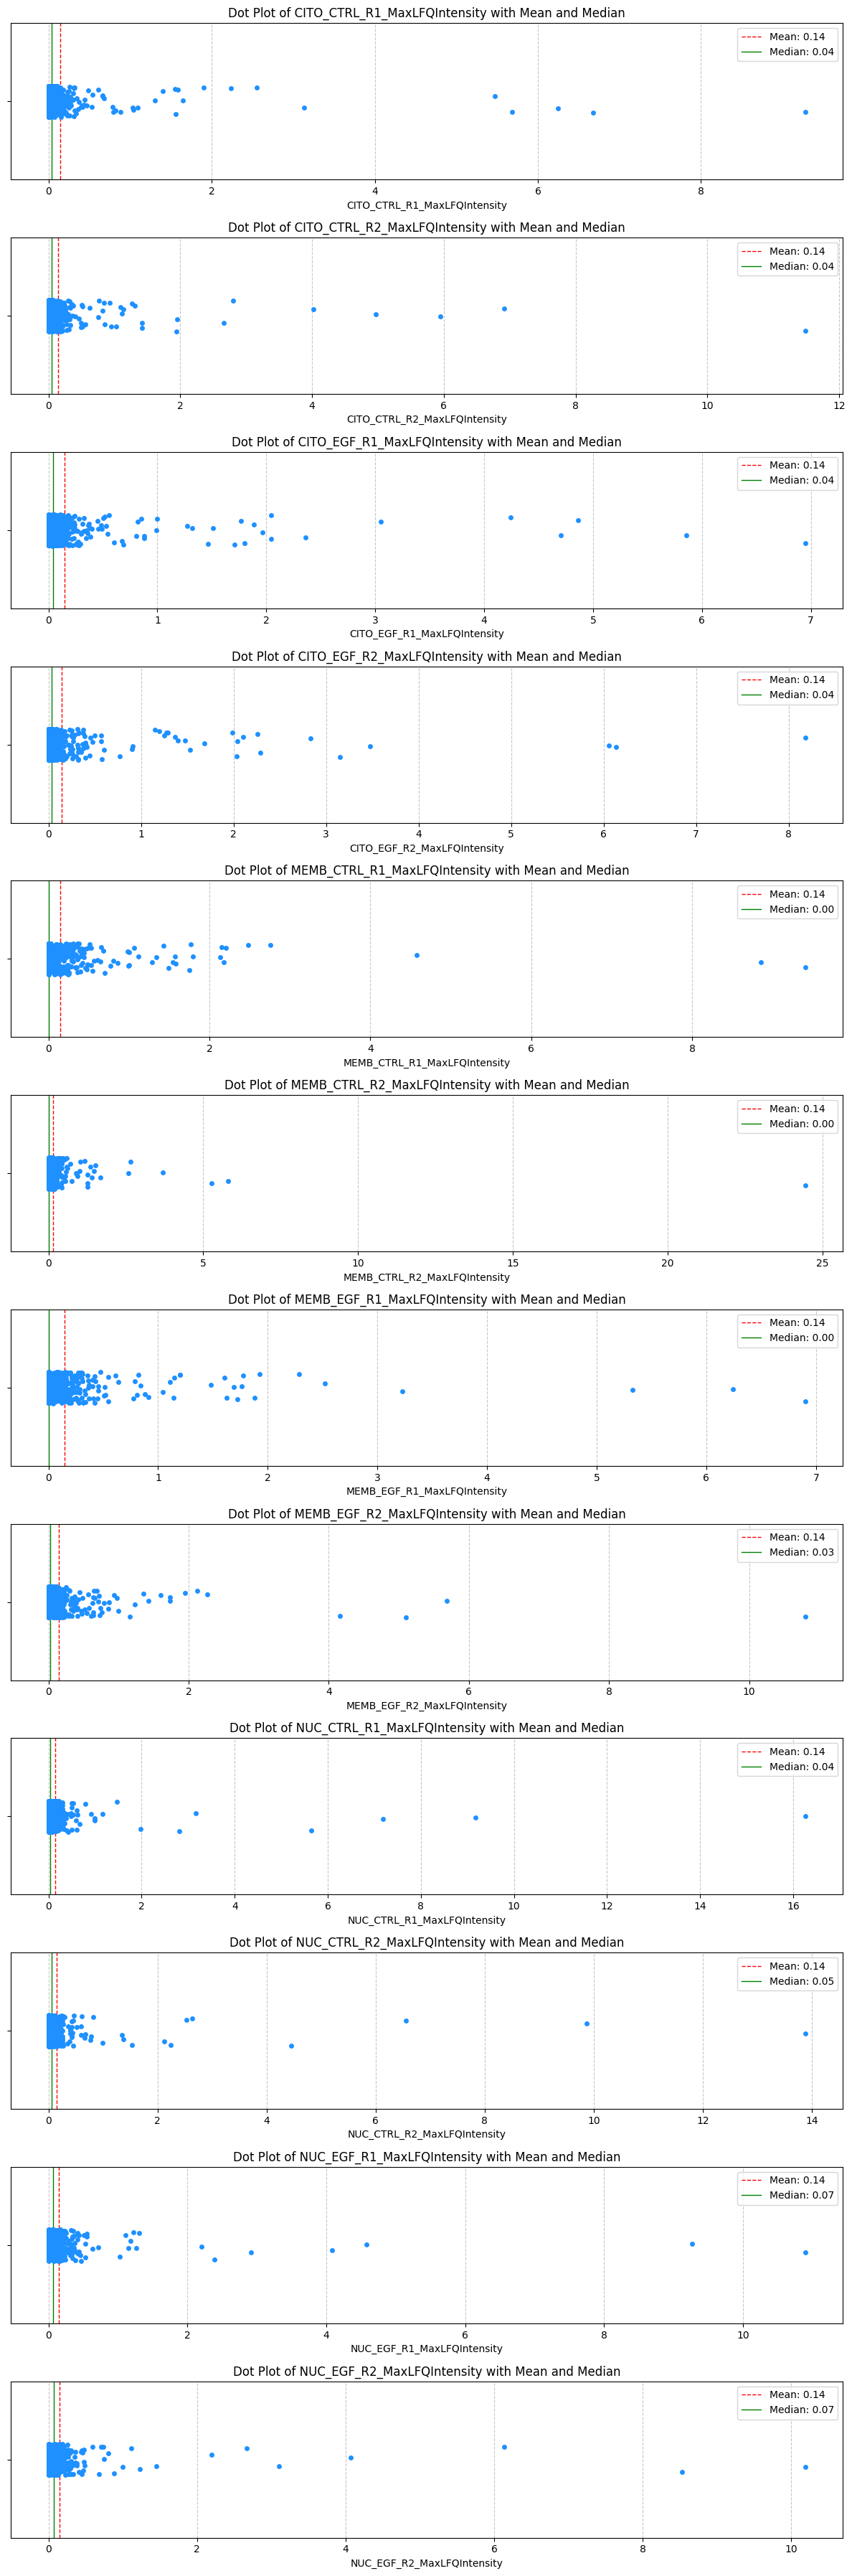

In [11]:
# Filter columns with "_MaxLFQIntensity"
maxlfq_cols = [col for col in df_filtered2_norm.columns if col.endswith('_MaxLFQIntensity')]

# Plotting each column as a separate dot plot with mean and median lines
plt.figure(figsize=(12, len(maxlfq_cols) * 3))  # Adjust figure size based on the number of columns
for i, col in enumerate(maxlfq_cols, 1):
    plt.subplot(len(maxlfq_cols), 1, i)
    
    # Plot dot plot for the column
    sns.stripplot(data=df_filtered2_norm, x=col, color="dodgerblue", size=5)
    
    # Calculate and plot mean and median lines
    mean_val = df_filtered2_norm[col].mean()
    median_val = df_filtered2_norm[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1, label=f'Median: {median_val:.2f}')
    
    # Add title, labels, and legend
    plt.title(f'Dot Plot of {col} with Mean and Median')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_56144/1922900342.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_to_plot, x='Column', y='NormalizedValue', palette='Set2')
/tmp/ipykernel_56144/1922900342.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_to_plot, x='Column', y='NormalizedValue', palette='Set2')
/tmp/ipykernel_56144/1922900342.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_to_plot, x='Column', y='NormalizedValue', palette='Set2')


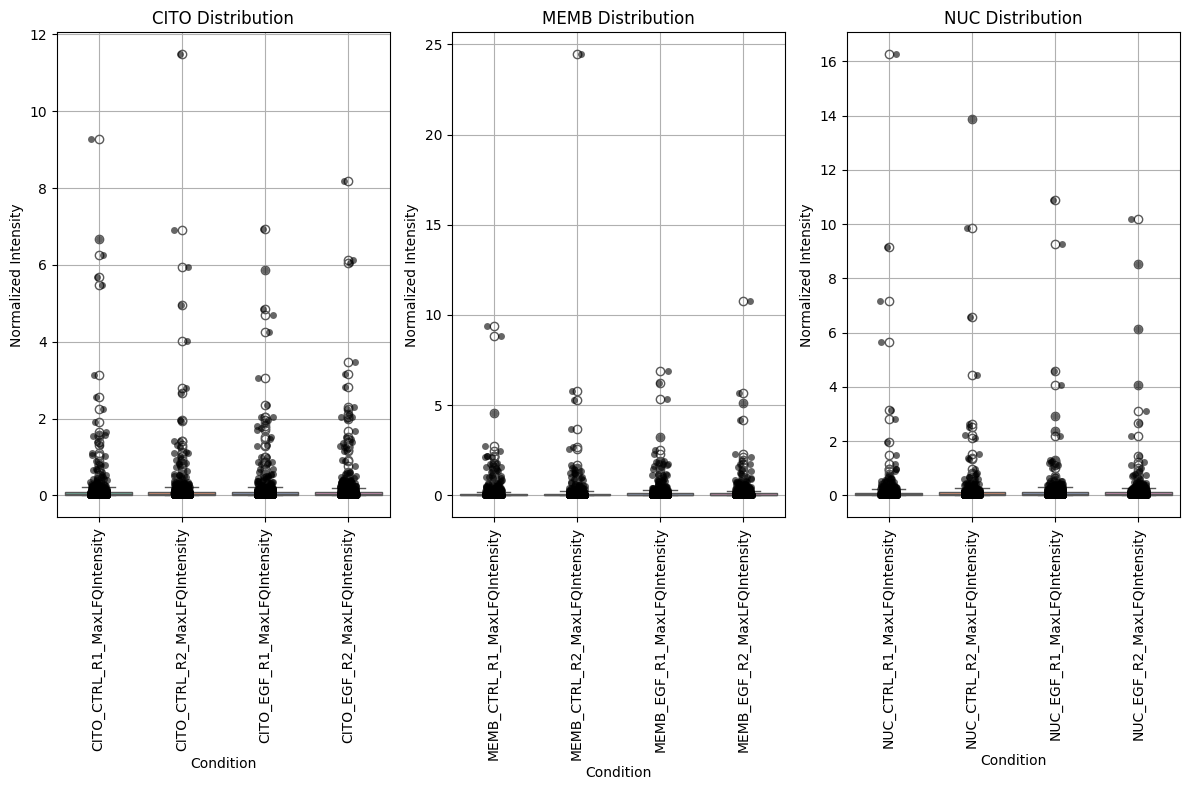

In [12]:
# Group columns based on their location (e.g., CITO_, MEMB_, NUC_) and ensure they end with '_MaxLFQIntensity'
cito_cols = [col for col in df_filtered2_norm.columns if col.startswith('CITO_') and col.endswith('_MaxLFQIntensity')]
memb_cols = [col for col in df_filtered2_norm.columns if col.startswith('MEMB_') and col.endswith('_MaxLFQIntensity')]
nuc_cols = [col for col in df_filtered2_norm.columns if col.startswith('NUC_') and col.endswith('_MaxLFQIntensity')]

# Combine all columns into a dictionary by group for easier plotting
compartments = {
    'CITO': cito_cols,
    'MEMB': memb_cols,
    'NUC': nuc_cols
}

# Create a function to plot boxplots for each group of columns
def plot_boxplots_with_dots(compartments):
    plt.figure(figsize=(12, 8))  # Adjust figure size
    for i, (group, cols) in enumerate(compartments.items(), 1):
        plt.subplot(1, 3, i)  # 1 row, 3 columns
        data_to_plot = df_filtered2_norm[cols].melt(var_name='Column', value_name='NormalizedValue')
        
        # Plotting box plot
        sns.boxplot(data=data_to_plot, x='Column', y='NormalizedValue', palette='Set2')

        # Add dots (strip plot) to show individual data points
        sns.stripplot(data=data_to_plot, x='Column', y='NormalizedValue', color='black', alpha=0.6, jitter=True)

        # Title and labels
        plt.title(f'{group} Distribution')
        plt.xlabel('Condition')
        plt.ylabel('Normalized Intensity')
        
        # Rotate x labels for better readability
        plt.xticks(rotation=90)
        
        # Grid for better readability
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot boxplots with dots for each group of columns
plot_boxplots_with_dots(compartments)

In [13]:
## Log Normalization 
import numpy as np
### Add 1 to all values in the '_MaxLFQIntensity' columns
df_filtered2_norm_log = df_filtered2_norm.copy()  # Create a copy of the original DataFrame
maxlfq_cols = [col for col in df_filtered2_norm.columns if col.endswith('_MaxLFQIntensity')]

### Add 1 to each column and then apply log normalization
for col in maxlfq_cols:
    df_filtered2_norm_log[col] = np.log10(df_filtered2_norm[col] + 1)

### Check the first few rows to confirm the changes
df_filtered2_norm_log.head()

,Protein,Protein_ID,Entry_Name,Gene,Protein_Length,Organism,Protein_Existence,Description,Protein_Probability,Top_Peptide_Probability,...,CITO_EGF_R2_MaxLFQIntensity,MEMB_CTRL_R1_MaxLFQIntensity,MEMB_CTRL_R2_MaxLFQIntensity,MEMB_EGF_R1_MaxLFQIntensity,MEMB_EGF_R2_MaxLFQIntensity,NUC_CTRL_R1_MaxLFQIntensity,NUC_CTRL_R2_MaxLFQIntensity,NUC_EGF_R1_MaxLFQIntensity,NUC_EGF_R2_MaxLFQIntensity,Indistinguishable_Proteins
0,sp|A6NEC2|PSAL_HUMAN,A6NEC2,PSAL_HUMAN,NPEPPSL1,478.0,Homo sapiens,2:Experimental evidence at transcript level,Puromycin-sensitive aminopeptidase-like protein,0.9628,0.9990,...,0.027552,0.0,0.000000,0.000000,0.000000,0.008386,0.000000,0.010342,0.016145,sp|P55786|PSA_HUMAN
1,sp|A8MWD9|RUXGL_HUMAN,A8MWD9,RUXGL_HUMAN,SNRPGP15,76.0,Homo sapiens,5:Protein uncertain,Putative small nuclear ribonucleoprotein G-lik...,0.8712,0.9962,...,0.000000,0.0,0.000000,0.000000,0.000000,0.026602,0.035917,0.031408,0.033722,sp|P62308|RUXG_HUMAN
2,sp|E9PAV3|NACAM_HUMAN,E9PAV3,NACAM_HUMAN,NACA,2078.0,Homo sapiens,1:Experimental evidence at protein level,Nascent polypeptide-associated complex subunit...,1.0000,0.9990,...,0.031506,0.0,0.022132,0.052310,0.028974,0.032488,0.000000,0.033255,0.029313,NaN
3,sp|O00148|DX39A_HUMAN,O00148,DX39A_HUMAN,DDX39A,427.0,Homo sapiens,1:Experimental evidence at protein level,ATP-dependent RNA helicase DDX39A,1.0000,0.9990,...,0.040632,0.0,0.023457,0.000000,0.042575,0.030143,0.039527,0.043705,0.036338,sp|Q13838|DX39B_HUMAN
4,sp|O00186|STXB3_HUMAN,O00186,STXB3_HUMAN,STXBP3,592.0,Homo sapiens,1:Experimental evidence at protein level,Syntaxin-binding protein 3,1.0000,0.9968,...,0.000000,0.0,0.000000,0.037485,0.030358,0.000000,0.000000,0.000000,0.000000,NaN


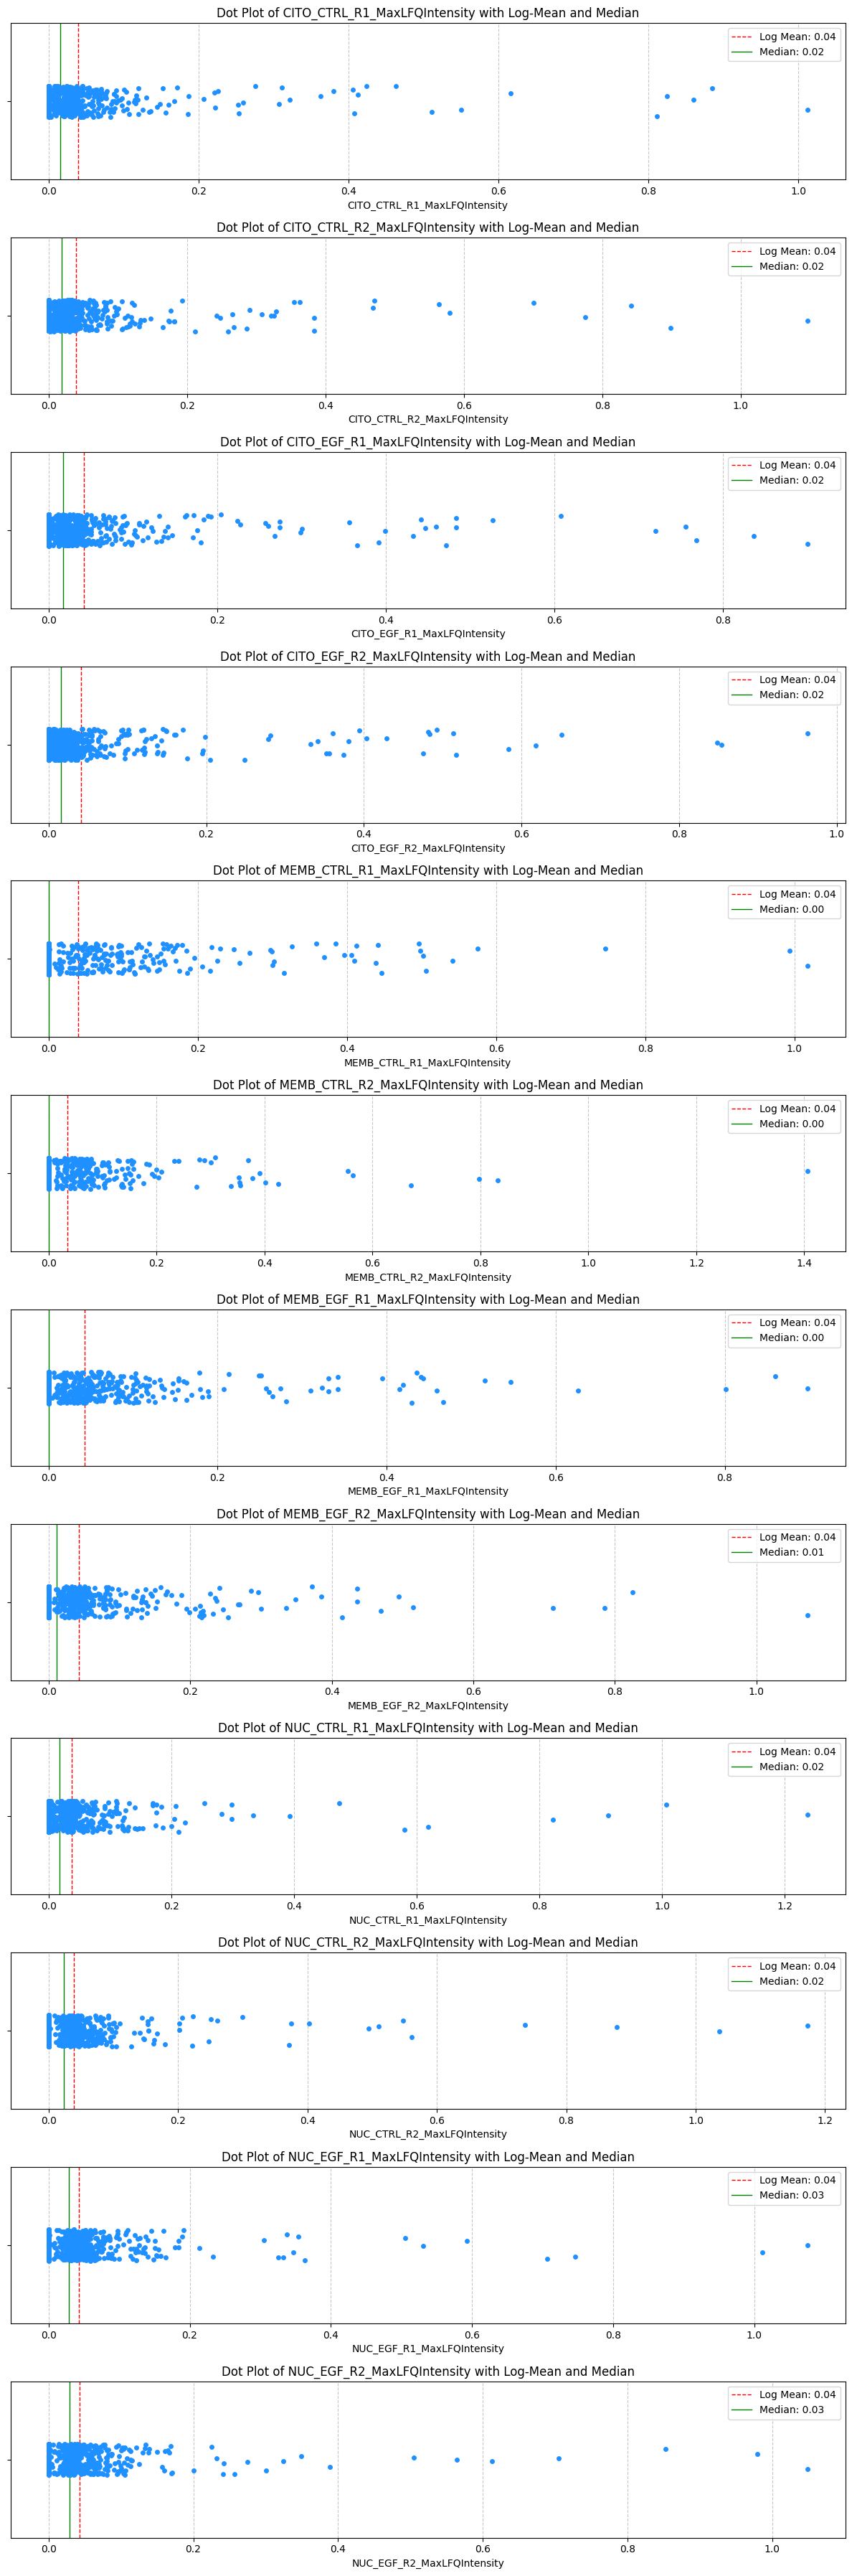

In [14]:
# Filter columns with "_MaxLFQIntensity"
maxlfq_cols = [col for col in df_filtered2_norm_log.columns if col.endswith('_MaxLFQIntensity')]

# Plotting each column as a separate dot plot with log-mean and median lines
plt.figure(figsize=(12, len(maxlfq_cols) * 3))  # Adjust figure size based on the number of columns
for i, col in enumerate(maxlfq_cols, 1):
    plt.subplot(len(maxlfq_cols), 1, i)
    
    # Plot dot plot for the column (log-transformed data)
    sns.stripplot(data=df_filtered2_norm_log, x=col, color="dodgerblue", size=5)
    
    # Calculate the mean of log-transformed values (log-mean)
    log_mean = df_filtered2_norm_log[col].mean()
    median_val = df_filtered2_norm_log[col].median()
    
    # Plot lines for log-mean and median
    plt.axvline(log_mean, color='red', linestyle='--', linewidth=1, label=f'Log Mean: {log_mean:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1, label=f'Median: {median_val:.2f}')
    
    # Add title, labels, and legend
    plt.title(f'Dot Plot of {col} with Log-Mean and Median')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_56144/387795543.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_to_plot, x='Column', y='LogNormalizedValue', palette='Set2')
/tmp/ipykernel_56144/387795543.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_to_plot, x='Column', y='LogNormalizedValue', palette='Set2')
/tmp/ipykernel_56144/387795543.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_to_plot, x='Column', y='LogNormalizedValue', palette='Set2')


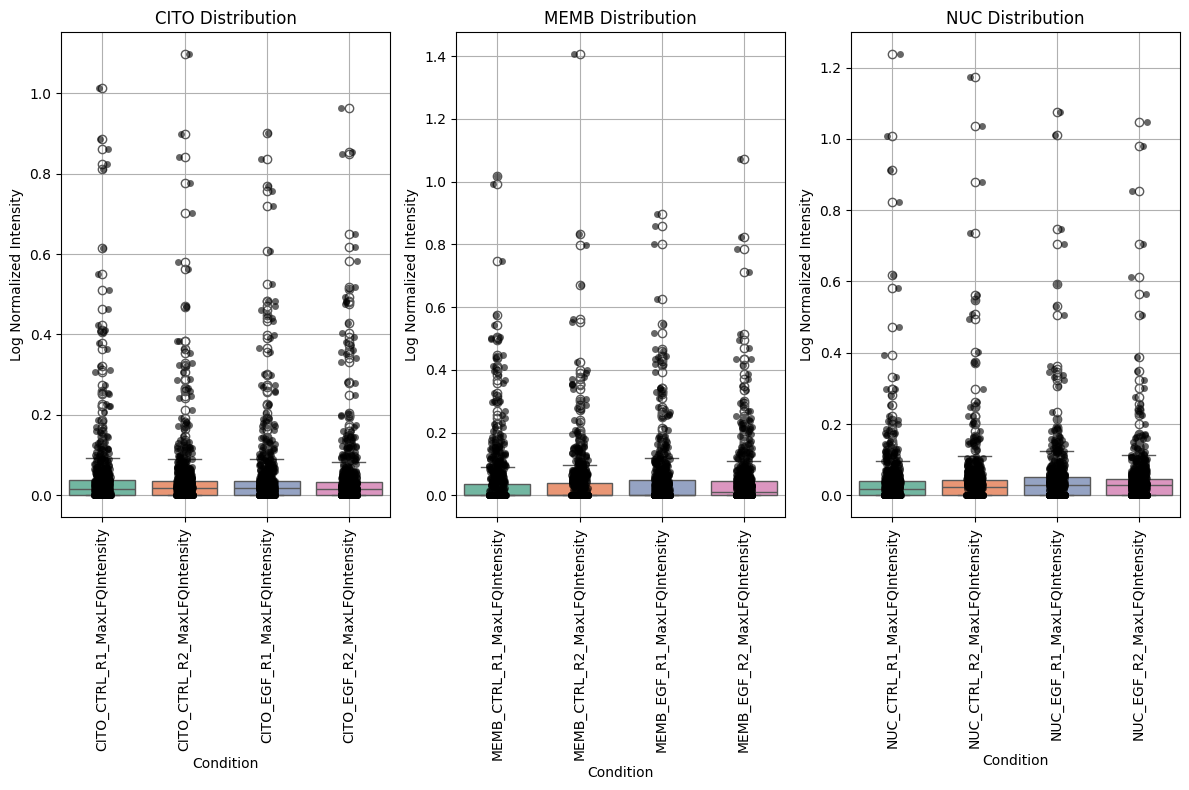

In [15]:
# Group columns based on their location (e.g., CITO_, MEMB_, NUC_) and ensure they end with '_MaxLFQIntensity'
cito_cols = [col for col in df_filtered2_norm_log.columns if col.startswith('CITO_') and col.endswith('_MaxLFQIntensity')]
memb_cols = [col for col in df_filtered2_norm_log.columns if col.startswith('MEMB_') and col.endswith('_MaxLFQIntensity')]
nuc_cols = [col for col in df_filtered2_norm_log.columns if col.startswith('NUC_') and col.endswith('_MaxLFQIntensity')]

# Combine all columns into a dictionary by group for easier plotting
compartments = {
    'CITO': cito_cols,
    'MEMB': memb_cols,
    'NUC': nuc_cols
}

# Create a function to plot boxplots for each group of columns
def plot_boxplots_with_dots(compartments):
    plt.figure(figsize=(12, 8))  # Adjust figure size
    for i, (group, cols) in enumerate(compartments.items(), 1):
        plt.subplot(1, 3, i)  # 1 row, 3 columns
        data_to_plot = df_filtered2_norm_log[cols].melt(var_name='Column', value_name='LogNormalizedValue')
        
        # Plotting box plot
        sns.boxplot(data=data_to_plot, x='Column', y='LogNormalizedValue', palette='Set2')

        # Add dots (strip plot) to show individual data points
        sns.stripplot(data=data_to_plot, x='Column', y='LogNormalizedValue', color='black', alpha=0.6, jitter=True)

        # Title and labels
        plt.title(f'{group} Distribution')
        plt.xlabel('Condition')
        plt.ylabel('Log Normalized Intensity')
        
        # Rotate x labels for better readability
        plt.xticks(rotation=90)
        
        # Grid for better readability
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot boxplots with dots for each group of columns
plot_boxplots_with_dots(compartments)

In [17]:
import os

## Specify the directory and file path
output_dir = "./data"
output_file = "df_filtered2_norm_log.tsv"

## Save the DataFrame as a TSV file
df_filtered2_norm_log.to_csv(os.path.join(output_dir, output_file), sep='\t', index=False)